In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile
sns.set_palette('colorblind')

In [31]:
songname = 'simple'

sr, tutor = wavfile.read('../data/{}.wav'.format(songname))
sr, synth = wavfile.read('../data/{}_out.wav'.format(songname))

In [32]:
sim = bsa.similarity(synth, tutor, samplerate=sr, threshold=0.05)

In [33]:
sim['similarity']

0.32372310570626761

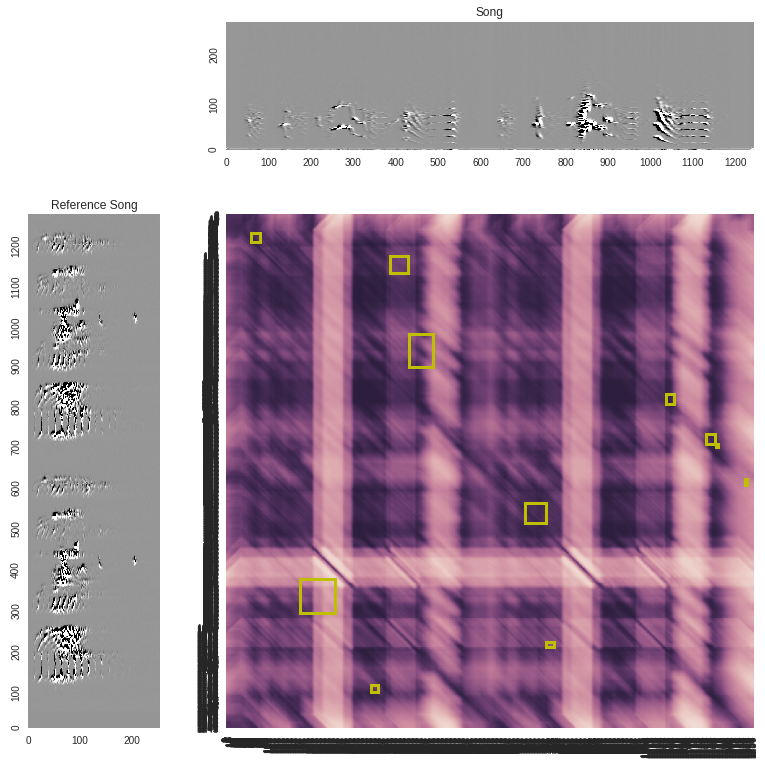

In [34]:
fig = bsa.similarity_plot(sim, synth, tutor)
plt.show(fig)

In [35]:
sdt = bsa.spectral_derivs(tutor)
sds = bsa.spectral_derivs(synth)

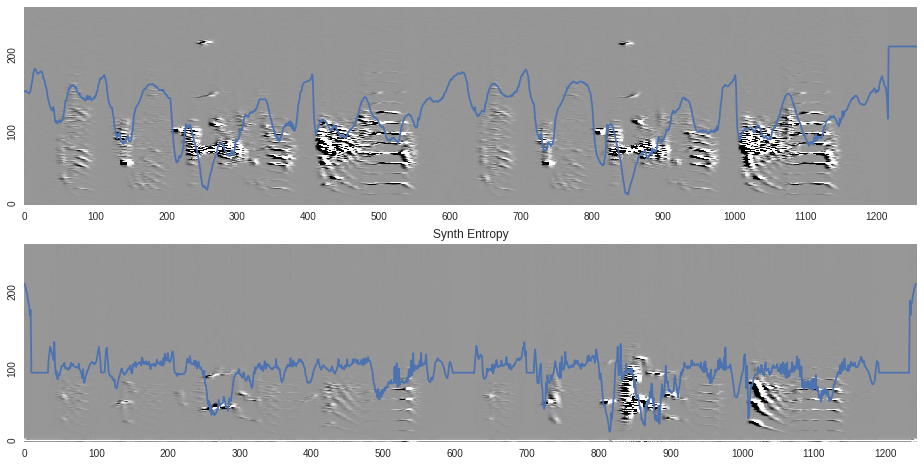

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_wiener_entropy(tutor), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_wiener_entropy(synth), ax2)
ax2.set_title('Synth Entropy')
plt.show(fig)

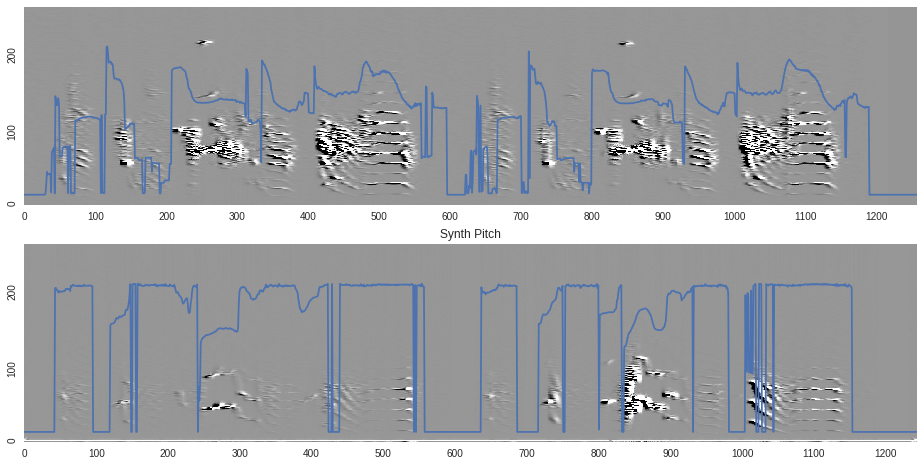

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_pitch(tutor, sr, 0.8), ax1)

pitch = bsa.song_pitch(synth, sr, 0.8)
pitch[pitch > np.percentile(pitch, 95)] = 0
pitch[bsa.song_amplitude(synth) < 60] = 0
ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(pitch, ax2)
ax2.set_title('Synth Pitch')
plt.show(fig)

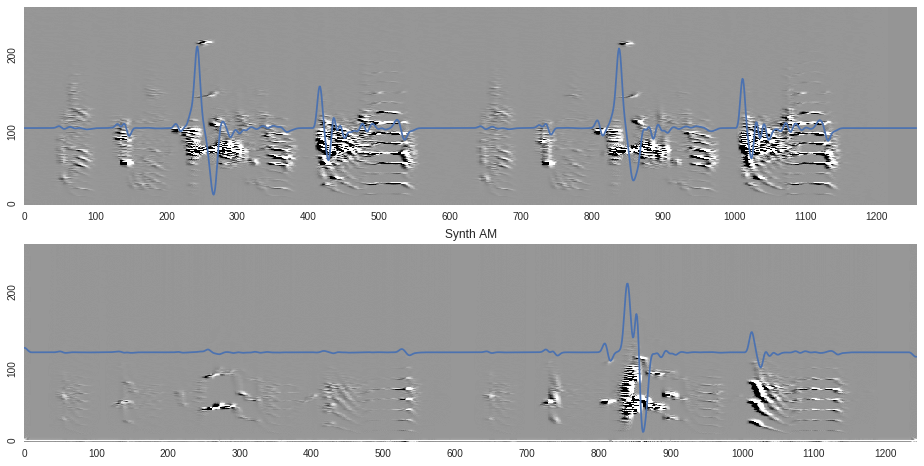

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_amplitude_modulation(tutor), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_amplitude_modulation(synth), ax2)
ax2.set_title('Synth AM')

plt.show(fig)

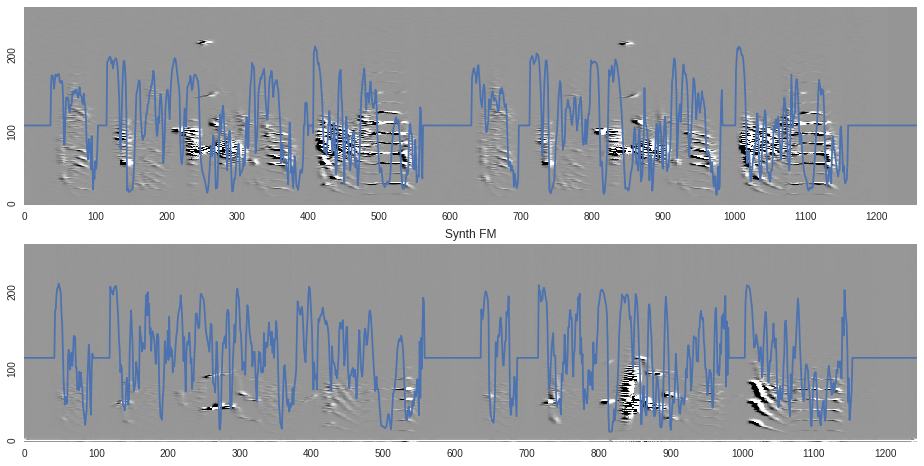

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
fm = bsa.song_frequency_modulation(tutor)
fm[bsa.song_amplitude(tutor) < 60] = np.median(fm[bsa.song_amplitude(tutor) > 60])
bsa.plot_over_spec(fm, ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
fm = bsa.song_frequency_modulation(synth)
fm[bsa.song_amplitude(synth) < 60] = np.median(fm[bsa.song_amplitude(synth) > 60])
bsa.plot_over_spec(fm, ax2)
ax2.set_title('Synth FM')
plt.show(fig)

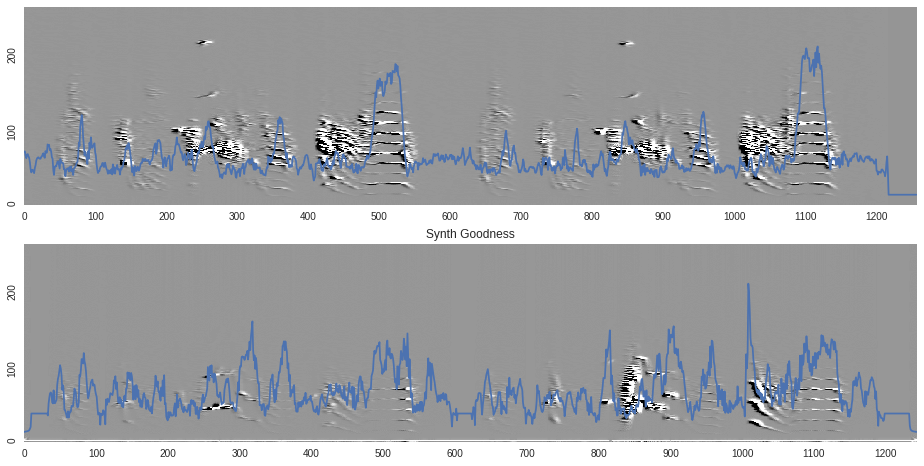

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_goodness(tutor), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_goodness(synth), ax2)
ax2.set_title('Synth Goodness')
plt.show(fig)

# Let see for one syllable

In [110]:
sr, tutor = wavfile.read('../data/ba_syllable_a_end.wav')
sr, synth = wavfile.read('../data/ba_syllable_a_end_out.wav')
sr, hillc = wavfile.read('../model/hillclimbing/out.wav')

In [111]:
tfeat = bsa.all_song_features(tutor, sr, pitch_threshold=0.6)
sfeat = bsa.all_song_features(synth, sr, pitch_threshold=0.6)
hfeat = bsa.all_song_features(hillc, sr, pitch_threshold=0.6)

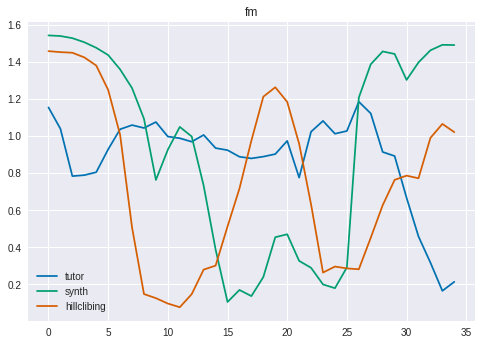

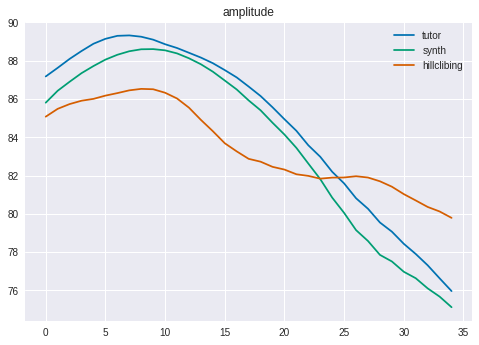

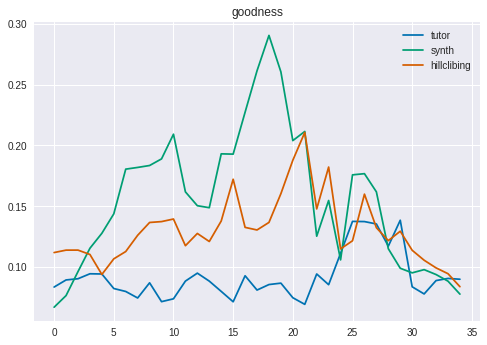

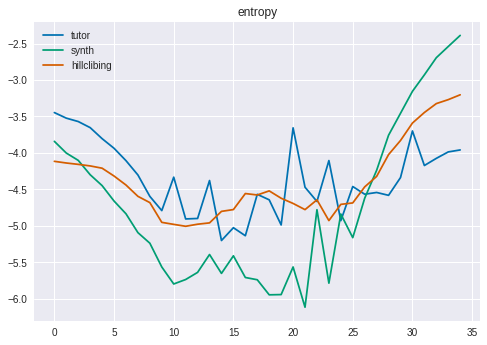

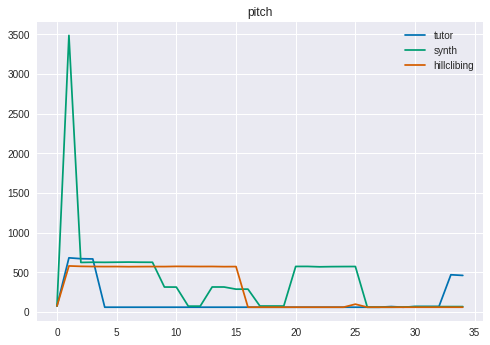

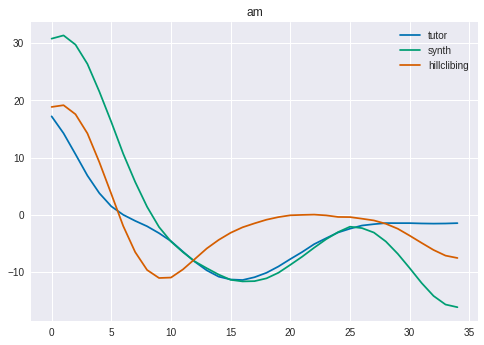

In [112]:
for fname in tfeat:
    plt.figure()
    plt.plot(tfeat[fname], label='tutor')
    plt.plot(sfeat[fname], label='synth')
    plt.plot(hfeat[fname], label='hillclibing')
    plt.legend()
    plt.title(fname)
    plt.show()

In [114]:
for fname in tfeat:
    print("*"*40)
    print(fname)
    print('tutor: mean: {}, std: {}'.format(np.mean(tfeat[fname]), np.std(tfeat[fname])))
    print('synth: mean: {}, std: {}'.format(np.mean(sfeat[fname]), np.std(sfeat[fname])))
    print('hill: mean: {}, std: {}'.format(np.mean(hfeat[fname]), np.std(hfeat[fname])))

****************************************
fm
tutor: mean: 0.883046507492384, std: 0.2431208457505277
synth: mean: 0.945204040457156, std: 0.5305389372114342
hill: mean: 0.7470407894155625, std: 0.4525640790297346
****************************************
amplitude
tutor: mean: 84.76860141049227, std: 4.293458531284033
synth: mean: 83.78821488354917, std: 4.545509679749326
hill: mean: 83.52059275559985, std: 2.165750097137772
****************************************
goodness
tutor: mean: 0.09198275332560582, std: 0.018941641437080776
synth: mean: 0.15540873070998992, std: 0.056288760200108
hill: mean: 0.1297994897778739, std: 0.027283529201459884
****************************************
entropy
tutor: mean: -4.344419800995795, std: 0.4869649125884549
synth: mean: -4.717927375743896, std: 1.0650185935449057
hill: mean: -4.385995494188445, std: 0.5116651921214251
****************************************
pitch
tutor: mean: 135.20739364624023, std: 189.17300810297667
synth: mean: 402.85394254